## Supervised Learning with scikit-learn

### CHAPTER 1. Classification
#### 1.1 Supervised learning

**Machine learning** is the art and science of:
* giving computers the ability to learn to make decisions from data
* without being explicitly programmed!

Examples:
* Learning to predict whether an email is spam or not
* Clustering wikipedia entries into different categories

**Unsupervised learning**:
* uncovering hidden patterns from unlabelled data

Examples:
Group customers into distinct categories 

**Reinforcement learning**:
Software agents interact with an environment
* Learn how to optimize their behavior
* Given a system of rewards and punishments
* Draws inspiration from behavioral psychology

Examples:
AlphaGo: first computer to defeat the world champion in Go

**Supervised learning**:
* Predictor variables/ features and a target variable
* The predicted values are known
* Aim: predict the target variable, given the predictor variables
    * Classification: target variable consits of categories
    * Regression: target variable is continuous
    
* Requirements before you use **supervised learning**:
    * No missing data
    * Data in numeric format
    * Data stored in pandas DataFrame or NumPy array
    
Supervised learning in Python:

We will use **'scikit-learn/ sklearn'** package.

Other packages may include **'TensorFlow' & 'keras'**.


In [9]:
# Basic supervised learning workflow

# from sklearn.module import Model
# model = Model()
# model.fit(X, y)
# predictions = model.predict(X_new)
# print(predictions)

#### 1.2 The classification challenge

There are four steps to build a classification model, or classifier, to predict the labels of unseen data.

* 1. Build a model
* 2. Model learns from the labeled data we pass to it
* 3. Pass unlabeled data to the model as input
* 4. Model predicts the labels of the unseen data

* Labeled data = training data

We will choose a simple algorithm called **K-nearest neighbors**.
* Basic idea: predict the label of a data point by:
    * Looking at the 'k' closest labeled data points
    * Taking a majority vote
    
Scikit-learn fit and predict:
* All machine learning models are implemented as Python classes.
    * They implement the algorithms for learning and predicting
    * Store the information learned from the data
* Training a model on the data = 'fitting' a model to the data
    * .fit() method
* To predict the labels of new data: .predict() method


In [10]:
# using sckit-learn to fit a classifier
# 1). split the data into features and target arrays
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

churn_df = pd.read_csv('1_datasets/telecom_churn_clean.csv')
X = churn_df[["total_day_charge", "total_eve_charge"]].values
y = churn_df["churn"].values

print(X.shape, y.shape)
# X and y are converted into NumPy arrays
# they have the same number of observations

(3333, 2) (3333,)


In [11]:
# 2). instantiate classifier and fit classifier
knn = KNeighborsClassifier(n_neighbors = 15)
knn.fit(X, y)

KNeighborsClassifier(n_neighbors=15)

In [12]:
# 3) create new unseen data
X_new = np.array([[56.8, 17.5],
                  [24.4, 24.1],
                  [50.1, 10.9]])
print(X_new.shape)

(3, 2)


In [13]:
#4) make predictions
prediction = knn.predict(X_new)
print('Prediction: {}'.format(prediction))

Prediction: [1 0 0]


#### 1.3 Measuring model performance

In classification, accuracy is a commonly used metric
* Accuracy = Fraction of correct predictions
It's a good practice to split data into training and test set. In this way, model performance could be better evaluated.
* Fit/ train the classifier on the training set
* Make the predictions on test set

To do this, we use a **train/test split** function in scikit-learn.

**Model complexity** for KNN models:
* Larger k = smoother decision boundary = less complex model = can lead to underfitting
* Smaller k = more complex model = can lead to overfitting


In [14]:
# train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=21, stratify=y)

knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)
print(knn.score(X_test, y_test))

0.872


In [15]:
# model complexity and over/underfitting

# setup arrays to store train and test accuracies
neighbors = np.arange(1,26)
train_accuracy = {}
test_accuracy = {}

# loop over different values of k
for neighbor in neighbors:
    knn = KNeighborsClassifier(n_neighbors=neighbor)
    knn.fit(X_train, y_train)
    
    train_accuracy[neighbor] = knn.score(X_train, y_train)
    test_accuracy[neighbor] = knn.score(X_test, y_test)

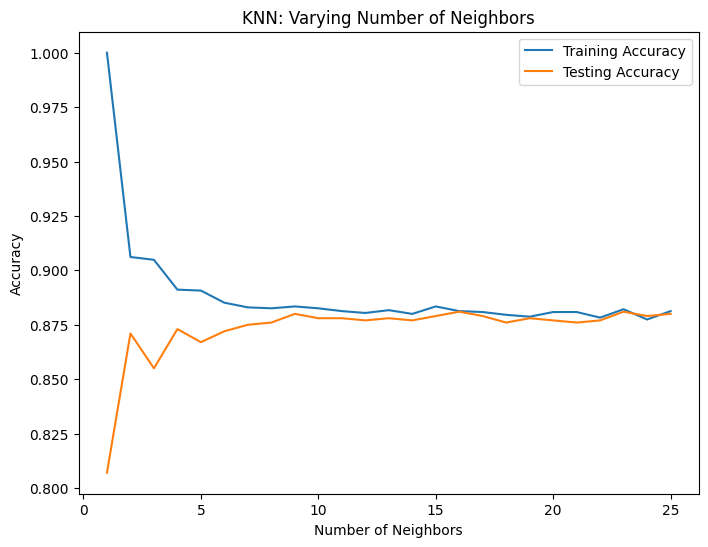

In [16]:
# plotting our results
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.title("KNN: Varying Number of Neighbors")
plt.plot(neighbors, train_accuracy.values(), label="Training Accuracy")
plt.plot(neighbors, test_accuracy.values(), label="Testing Accuracy")
plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")
plt.show()

# now we can see underfitting and overfitting in different neighbor numbers.

### CHAPTER 2. Regression
#### 2.1 Introduction to regression

In regression, **target variable is continuous**.

The process of building regression model is similar to building a classification model.
* 1. Creating features and target arrays
* 2. Splitting training and test set
* 3. Fitting a regression model
* 4. Making predictions

In [17]:
# load CVS file about diabetes
import numpy as np
import pandas as pd

diabetes_df = pd.read_csv('1_datasets/diabetes_clean.csv')
print(diabetes_df.head())


   pregnancies  glucose  diastolic  triceps  insulin   bmi    dpf  age  \
0            6      148         72       35        0  33.6  0.627   50   
1            1       85         66       29        0  26.6  0.351   31   
2            8      183         64        0        0  23.3  0.672   32   
3            1       89         66       23       94  28.1  0.167   21   
4            0      137         40       35      168  43.1  2.288   33   

   diabetes  
0         1  
1         0  
2         1  
3         0  
4         1  


In [18]:
# creating feature and target arrays
X = diabetes_df.drop("glucose", axis=1).values
y = diabetes_df["glucose"].values

# confirm they are NumPy arrays
print(type(X), type(y))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [19]:
# making predictions from a single feature: bmi
# extracting a single feature: bmi
X_bmi = X[:, 5]
print(y.shape, X_bmi.shape)

(768,) (768,)


In [20]:
#convert 1D array to 2D array
X_bmi = X_bmi.reshape(-1, 1)
print(X_bmi.shape)
# now the shape is correct

(768, 1)


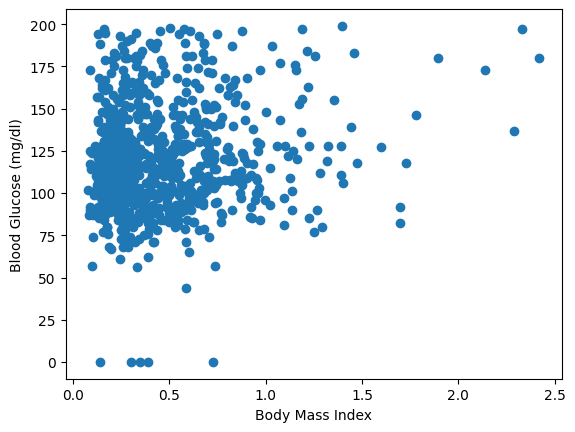

In [21]:
# plotting glucose VS. body mass index
import matplotlib.pyplot as plt
plt.scatter(X_bmi, y)
plt.ylabel("Blood Glucose (mg/dl)")
plt.xlabel("Body Mass Index")
plt.show()

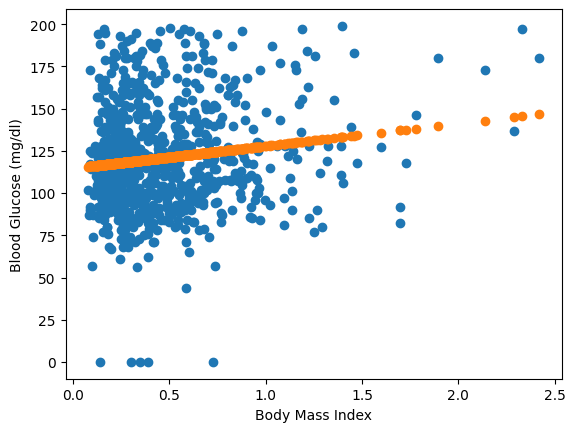

In [22]:
# fitting a regression model
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_bmi, y)
predictions = reg.predict(X_bmi)
plt.scatter(X_bmi, y)
plt.scatter(X_bmi, predictions)
plt.ylabel("Blood Glucose (mg/dl)")
plt.xlabel("Body Mass Index")
plt.show()

# it looks like we have a weak-to-moderate linear relatinship.

#### 2.2 The basics of linear regression
* y = ax + b
    * y = target
    * x = single feature
    * a, b = parameters/coefficients of model - slope, intercept
    
* How do we choose a and b?
    * define an **error function** for any given line 
    * choose the line that minimizes the error function

**The loss function**:
We call the vertical distance between the predicted point and the actual point **residual**. 

The sum of **square of the residuals** will be the total loss of Ordinary Least Squares (OLS).

In higher dimensions, it is known as **multiple regression**.
* y = a1x1 + a2x2 + a3x3 + ... anxn + b

**R-sqaured**:
R2 quantifies the variance in target values explained by the features. 

* Values range from 0 to 1.

**Mean squared error and root mean squared error**:
* MSE is measured in target units, squared

* RMSE is measured in the same units at the target variable
    * RMSE is the square root of MSE


In [23]:
# linear regression using all features

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = diabetes_df.drop("glucose", axis=1).values
y = diabetes_df["glucose"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                   random_state=42)

reg_all = LinearRegression()
reg_all.fit(X_train, y_train)

y_pred = reg_all.predict(X_test)

# # print R^2 in scikit-learn
print('R^2: {}'.format(reg_all.score(X_test, y_test)))

# # mean squared error and root mean squared error
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(y_test, y_pred, squared=False)
print('Root Mean Squared Error: {}'.format(rmse))


R^2: 0.28280468810375115
Root Mean Squared Error: 26.341459582232265


#### 2.3 Cross-validation

**Cross-validation motivation:**
* Model performance is dependent on the way we split up the data
* Not representative of the model's ability to generalize to unseen data

* Solution: **cross-validation!**

Cross-validation split the data sets into several data folds and each fold has a chance to be the test set. In this way, data set is well generalized to unseen data.

In [24]:
# cross-validation in scikit-learn

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, KFold

# create KFold
kf = KFold(n_splits=6, shuffle=True, random_state=42)

# create a linear regression
reg = LinearRegression()

# get cross-validation results
cv_results = cross_val_score(reg, X, y, cv=kf)

# print the results
print(cv_results)

# print the mean and standard deviation 
print('Mean score: {}'.format(np.mean(cv_results)))
print('Standard Deviation: {}'.format(np.std(cv_results)))

# print 95% confidence interval
print('95% CI: {}'.format(np.quantile(cv_results, [0.025, 0.975])))

[0.26207548 0.28228176 0.41203082 0.23785884 0.41634629 0.30398869]
Mean score: 0.3190969786734479
Standard Deviation: 0.0701532061011419
95% CI: [0.24088592 0.41580685]


#### 2.4 Regularized regression

**Why regularize?**:
* Recall: Linear regression minimizes a loss function
* It chooses a coefficient a for each feature variable, plus intercept b
* Large coefficients can lead to overfitting
* Regularization: Penalize large coefficients

**Regularization types**:
* 1. Ridge regression
    * Loss function = OLS loss function + alpha * sum (ai^2)
    * Ridge penalizes large positive or negative coefficients
    * alpha: parameter we need to choose
    * Picking alpha is similar to picking k in KNN
    * Hyperparameter: variable used to optimize model parameters
    * alpha controls model complexity:
         * alpha = 0 -> OLS (can lead to overfitting)
         * very high alpha -> can lead to underfitting
 
* 2. Lasso regression
    * Loss function = OLS loss function + alpha * sum(|ai|)
    * Lasso can select important features of a dataset
    * Shrinks the coefficients of less important features to zero
    * Features not shrunk to zero are selected by lasso

In [25]:
# ridge regression in scikit-learn
from sklearn.linear_model import Ridge
scores = []
for alpha in [0.1, 1.0, 10.0, 100.0, 1000.0]:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    y_pred = ridge.predict(X_test)
    scores.append(ridge.score(X_test, y_test))
    
print(scores)    

[0.28284666232222233, 0.28320633574804766, 0.2853000732200003, 0.26423984812668155, 0.19292424694100963]


In [26]:
# lasso regression in scikit-learn
from sklearn.linear_model import Lasso
scores = []
for alpha in [0.01, 1.0, 10.0, 20.0, 50.0]:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train, y_train)
    lasso_pred = lasso.predict(X_test)
    scores.append(lasso.score(X_test, y_test))

print(scores)

[0.2831114455475573, 0.29795609755827845, 0.17989838789273893, 0.18127361610181125, 0.15679544303617987]


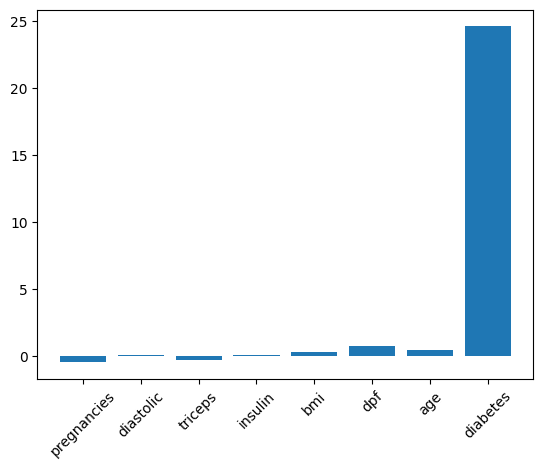

In [27]:
# lasso for feature selection in scikit-learn
from sklearn.linear_model import Lasso
X = diabetes_df.drop("glucose", axis=1).values
y = diabetes_df["glucose"].values
names = diabetes_df.drop("glucose", axis=1).columns

# get lasso coefficients
lasso = Lasso(alpha=0.1)
lasso_coef = lasso.fit(X, y).coef_

# plot the coefficients
plt.bar(names, lasso_coef)
plt.xticks(rotation=45)
plt.show()

### CHAPTER 3. Fine-Tuning Your Model
#### 3.1 How good is your model?

* Accuracy is not always a useful metric to measure model performance.
* When classes are imbalanced, we **NEED new ways** to measure performance!

* 1. **Confusion matrix** for classificatoin performance
    * It can retrieve **accuracy**: (True negative + True positive)/ All
    * It can retrieve **precision**: True positive/ All positive predictions
    * It can retrieve **recall**: True positive/ (True positive + False negative)
    * F1 score  = 2 * (precision * recall)/ (precision + recall)


In [28]:
# confusion matrix in scikit-learn
from sklearn.metrics import classification_report, confusion_matrix
knn = KNeighborsClassifier(n_neighbors=7)

X = diabetes_df.drop("diabetes", axis=1).values
y = diabetes_df["diabetes"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,
                                                   random_state=42)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [29]:
# print confusion matrix
print(confusion_matrix(y_test, y_pred))

[[163  43]
 [ 45  57]]


In [30]:
# print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.79      0.79       206
           1       0.57      0.56      0.56       102

    accuracy                           0.71       308
   macro avg       0.68      0.68      0.68       308
weighted avg       0.71      0.71      0.71       308



#### 3.2 Logistic regression and the ROC curve

* Logistic regression is used for classification problems
* Logistic regression outputs probability p that an observation belongs to a binary class
* If the probability p > 0.5:
    * The data is labeled 1
* If the probability p < 0.5:
    * The data is labeled 0
* By default, logistic regression threshold = 0.5
* **What happens if we vary the threshold?**
* We can use a receiver operating characteristic, or **ROC curve**, to visualize how different thresholds affect true positive and false positive rates.
* **How do we quantify the model performance based on this plot?**
* We calculate the area under the ROC curve, a metric known as **AUC**. Scores range from zero to one, with one being ideal.

In [31]:
# logistic regression in scikit-learn
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

# use the churn dataset as df
X = churn_df.drop("churn", axis=1).values
y = churn_df["churn"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

E:\PYTHON\Lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [32]:
# predicting probabilities
y_pred_probs = logreg.predict_proba(X_test)[:, 1]
print(y_pred_probs[0])

0.15938699039559182


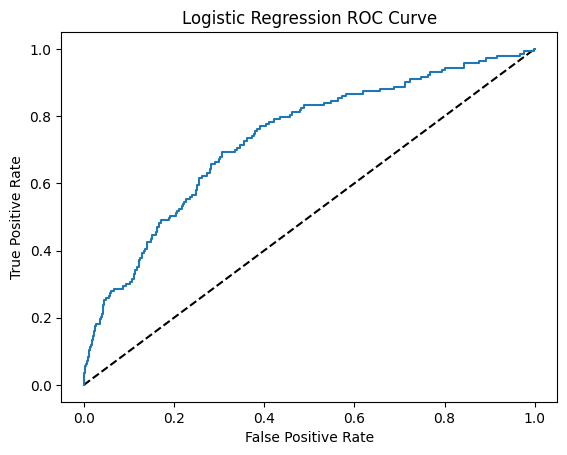

In [33]:
# plotting the ROC curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)

plt.plot([0,1], [0, 1], 'k--')

plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.show()

In [34]:
# ROC AUC in scikit-learn
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test, y_pred_probs))

0.732356325121786


#### 3.3 Hyperparameter tuning

* Hyperparameters: parameters we specify before fitting the model
    * Ridge/lasso regression: Choosing **alpha**
    * KNN: Choosing **n_neighbors**
* An important step: choosing the correct hyperparameters
    * 1. Try lots of different hyperparameter values
    * 2. Fit all of them separately
    * 3. See how well they perform
    * 4. Choose the best performing values
* This is called **hyperparameter tuning**!
* It is essential to use cross-validation to avoid overfitting to the test set
* We can still split the data and perform cross-validation on the training set
* We withhold the test set for final evaluation

* Cross-validation types:
    * 1. **Grid search** cross-validation: a grid of all possible hyperparameter values
    * 2. **Random search** cross-validation: picks random hyperparameter values
    


In [51]:
# GridSearchCV in scikit-learn

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.linear_model import Ridge

# get the dataset
X = churn_df.drop("churn", axis=1).values
y = churn_df["churn"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# create a KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)
param_grid = {"alpha": np.arange(0.001, 1, 10),
             "solver": ["sag", "lsqr"]}

# create a grid search CV model
ridge = Ridge()
ridge_cv = GridSearchCV(ridge, param_grid, cv=kf)
ridge_cv.fit(X_train, y_train)
print(ridge_cv.best_params_, ridge_cv.best_score_)

{'alpha': 0.001, 'solver': 'sag'} 0.09010303174313208


In [36]:
# RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
kf = KFold(n_splits=5, shuffle=True, random_state=42)
param_grid = {"alpha": np.arange(0.001, 1, 10),
             "solver": ["sag", "lsqr"]}
ridge = Ridge()
ridge_cv = RandomizedSearchCV(ridge, param_grid, cv=kf, n_iter=2)
ridge_cv.fit(X_train, y_train)
print(ridge_cv.best_params_, ridge_cv.best_score_)

{'solver': 'sag', 'alpha': 0.001} 0.09009622424996115


In [52]:
# evaluating on the test set
test_score = ridge_cv.score(X_test, y_test)
print(test_score)

0.12202055968359227


### CHAPTER 4 Preprocessing and Pipelines
#### 4.1 Preprocessing data

Scikit-learn requirements:
* Numeric data
* No missing values

Real-world data is rarely the case, so we **NEED TO preprocess data** first

Dealing with **categorical features**:
* Scikit-learn will not accept categorical features by default
* Need to convert categorical features into numeric values
* Convert to binary features called dummy variables
    * 0: Observation was NOT that category
    * 1: Observation was that category
* Use scikit-learn: *OneHotEncoder()*
* Use pandas: *get_dummies()*

In [38]:
# encoding dummy variables 

# our dataset is alredy clean and does NOT need to encoded
music_df = pd.read_csv('1_datasets/music_clean.csv')
print(music_df.head())

# the dummy variable process should be as follows:

# approach 1)
# music_dummies = pd.get_dummies(music_df["genre"], drop_first=True)
# print(music_dummies.head())

# music_dummies = pd.concat([music_df, music_dummies], axis=1)
# music_dummies = pd.drop("genre", axis = 1)

# approach 2)
# music_dummies = pd.get_dummies(music_df, drop_first=True)

   Unnamed: 0  popularity  acousticness  danceability  duration_ms  energy  \
0       36506        60.0      0.896000         0.726     214547.0   0.177   
1       37591        63.0      0.003840         0.635     190448.0   0.908   
2       37658        59.0      0.000075         0.352     456320.0   0.956   
3       36060        54.0      0.945000         0.488     352280.0   0.326   
4       35710        55.0      0.245000         0.667     273693.0   0.647   

   instrumentalness  liveness  loudness  speechiness    tempo  valence  genre  
0          0.000002    0.1160   -14.824       0.0353   92.934    0.618      1  
1          0.083400    0.2390    -4.795       0.0563  110.012    0.637      1  
2          0.020300    0.1250    -3.634       0.1490  122.897    0.228      1  
3          0.015700    0.1190   -12.020       0.0328  106.063    0.323      1  
4          0.000297    0.0633    -7.787       0.0487  143.995    0.300      1  


In [39]:
# linear regression with dummy variables
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression

X = music_df.drop("popularity", axis=1).values
y = music_df["popularity"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                   random_state=42)
kf = KFold(n_splits=5, shuffle=True, random_state=42)
linreg = LinearRegression()
linreg_cv = cross_val_score(linreg, X_train, y_train, cv=kf, 
                           scoring="neg_mean_squared_error")
print(np.sqrt(-linreg_cv))

[10.19270166 10.43734567  9.25570311  9.20541221  9.85376468]


#### 4.2 Handling missing data

* Missing data: No value for a feature in a particular row
* This can occur because:
    * There may have been no observation
    * The data might be corrupt

* We need to deal with missing data
    * Method 1: Dropping missing data
    * Method 2: Imputing values for missing data
        * use mean
        * use median
        * use most frequent value (mode) for categorical values
        * must split data first, to avoid data leakage

In [40]:
# check missing values in python
print(music_df.isna().sum().sort_values())

Unnamed: 0          0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
genre               0
dtype: int64


In [41]:
# drop missing data in python

# (our dataset is clean, I just commented below code)
# music_df = music_df.dropna(subset=["genre", "popularity", 
#                                    "loudness", "liveness", "tempo"])

In [42]:
# imputation with scikit-learn

# (our dataset is clean, I just commented below code)

# from sklearn.impute import SimpleImputer
# X_cat = music_df["genre"].reshape(-1, 1)
# X_num = music_df.drop(["genre", "popularity"], axis=1).values
# y = music_df["popularity"].values

# X_train_cat, X_test_cat, y_train, y_test = train_test_split(X_cat, y,test_size=0.2, random_state=12)
# X_train_num, X_test_num, y_train, y_test = train_test_split(X_num, y, test_size=0.2, random_state=12)

# # imputer for categorical features
# imp_cat = SimpleImputer(strategy="most_frequent")
# X_train_cat = imp_cat.fit_transform(X_train_cat)
# X_test_cat = imp_cat.transform(X_test_cat)

# # imputer for numeric features
# imp_num = SimpleImputer()
# X_train_num = imp_num.fit_transform(X_train_num)
# X_test_num = imp_num.transform(X_test_num)

# # combine
# X_train = np.append(X_train_num, X_train_cat, axis=1)
# X_test = np.append(X_test_num, X_test_cat, axis=1)


In [43]:
# imputing with a pipeline
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# drop missing datas and convert categorical feature
# music_df = music_df.dropna(subset=["genre", "popularity", 
#                                    "loudness", "liveness", "tempo"])
# music_df["genre"] = np.where(music_df["genre"]=="Rock", 1, 0)

X = music_df.drop("genre", axis=1).values
y = music_df["genre"].values

# create pipeline steps
steps = [("imputation", SimpleImputer()),
        ("logistic_regression", LogisticRegression())]
pipeline = Pipeline(steps)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

pipeline.fit(X_train, y_train)
pipeline.score(X_test, y_test)


0.8033333333333333

#### 4.3 Centering and scaling

Why scale our data?
* Many models use some form of distance to inform them
* Features on large scales can disproportionately influence the model
* We want features to be on a similar scale
    * Normalizing
    * Standardizing
    
How to scale our data?
* Subtract the mean and divide by variance
    * All features are centered around zero and have a variance of one
    * This is called **standardization**   
* Subtract the minimum and divide by the range
    * Minimum zero and maximum one
* Normalize the data so the range is -1 to 1

In [44]:
# scaling in scikit-learn
from sklearn.preprocessing import StandardScaler
X = music_df.drop("genre", axis=1).values
y = music_df["genre"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                   random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# check the difference after scaling
print(np.mean(X), np.std(X))
print(np.mean(X_train_scaled), np.std(X_train_scaled))

20666.582585618085 68890.98734103922
3.5971225997855074e-16 0.9999999999999996


In [45]:
# scaling in a pipeline
steps = [('scaler', StandardScaler()),
        ('knn', KNeighborsClassifier(n_neighbors = 6))]
pipeline = Pipeline(steps)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                   random_state=42)
knn_scaled = pipeline.fit(X_train, y_train)
y_pred = knn_scaled.predict(X_test)
print(knn_scaled.score(X_test, y_test))

0.89


In [46]:
# comparing performance with unscaled data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                   random_state=42)
knn_unscaled = KNeighborsClassifier(n_neighbors=6).fit(X_train, y_train)
print(knn_unscaled.score(X_test, y_test))

0.925


In [47]:
# Cross-Validation and scaling in a pipeline
from sklearn.model_selection import GridSearchCV
steps = [('scaler', StandardScaler()),
        ('knn', KNeighborsClassifier())]
pipeline = Pipeline(steps)
parameters = {"knn__n_neighbors": np.arange(1, 50)}

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=21)
cv = GridSearchCV(pipeline, param_grid = parameters)
cv.fit(X_train, y_train)
y_pred = cv.predict(X_test)

In [48]:
# checking model performance and parameters
print(cv.best_score_)
print(cv.best_params_)

0.9099999999999999
{'knn__n_neighbors': 6}


#### 4.4 Evaluating multiple models

Some guiding principles about which model to use at first place:
* **Size** of the dataset
    * Fewer features = simpler model, faster training time
    * Some models require large amounts of data to perform well
* **Interpretability**
    * Some models are easier to explain, which can be important for stakeholders
    * Linear regression has high interpretability, as we can understand the coefficients
* **Flexibility**
    * May improve accuracy, by making fewer assumptions about data
    * KNN is a more flexible model, doesn't assume any linear relationships

It's all in the metrics. Some metrics are widely used in many models and can be compared easily.
* **Regression** model performance:
    * RMSE (Root Mean Squared Error)
    * R-squared  
* **Classification** model performance:
    * Accuracy
    * Confusion matrix
    * Precision, recall, F-1 score
    * ROC AUC
* Train several models and evaluate performance out of the box

* Some models are affected by **scaling**:
    * KNN
    * Linear Regression (plus Ridge, Lasso)
    * Logistic Regression
    * Artificial Nerual Network
    
* It is best to **scale our data** before evaluating models

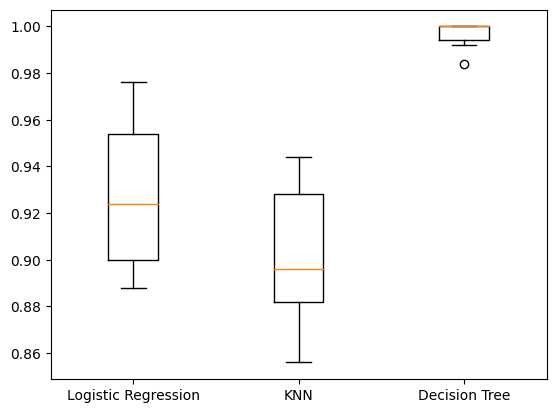

In [49]:
# evaluating classificaton models in scikit-learn
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

music_df = pd.read_csv('1_datasets/music_clean.csv')
X = music_df.drop("genre", axis = 1).values
y = music_df["genre"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# create models dictionary
models = {"Logistic Regression": LogisticRegression(),
         "KNN":KNeighborsClassifier(),
         "Decision Tree": DecisionTreeClassifier()}

# loop models and store results
results = []
for model in models.values():
    kf = KFold(n_splits=6, shuffle=True, random_state=42)
    cv_results = cross_val_score(model, X_train_scaled, y_train, cv=kf)
    results.append(cv_results)

# plot the results
plt.boxplot(results, labels=models.keys())
plt.show()

In [50]:
# test set performance
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    test_score = model.score(X_test_scaled, y_test)
    print("{} Test Set Accuracy: {}".format(name, test_score))
    
# now we can see which model performs the best

Logistic Regression Test Set Accuracy: 0.864
KNN Test Set Accuracy: 0.888
Decision Tree Test Set Accuracy: 1.0


Welcome to the end of this course!